In [407]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from matplotlib.ticker import MaxNLocator
%matplotlib inline

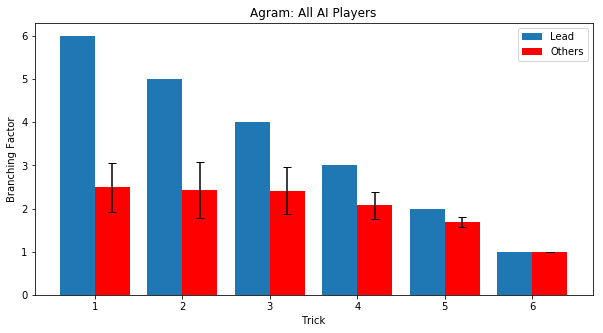

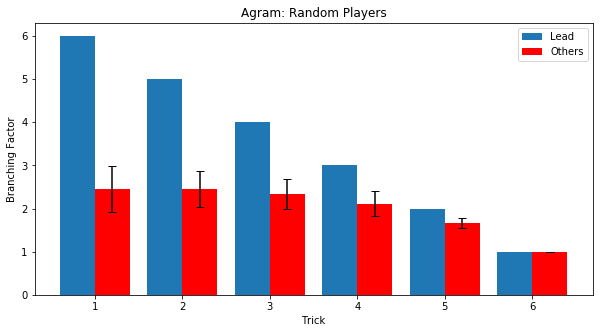

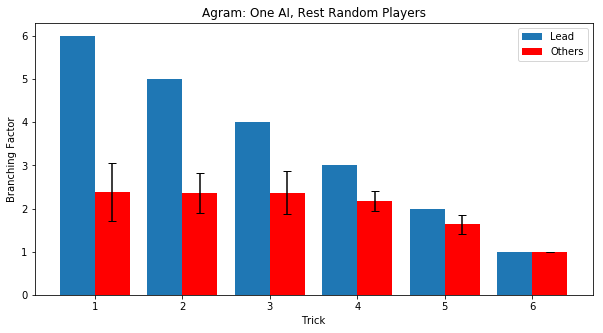

In [411]:
count = {"AllAI":100, "AllRnd":100, "RndandAI":100}
typename = {"AllAI":"All AI Players", "AllRnd":"Random Players", "RndandAI":"One AI, Rest Random Players"}
nump = {"Agram":4, "Pairs":2, "NinetyEight":4}
game = "Agram"
w = 0.4
tricks = 6
epoch = 10
for type in count.keys():
    fopen = open("data/" + game + ".gdl" + type + "-choicestats.txt")
    data = fopen.readlines()
    fopen.close()
    nump = 4
    lead = np.zeros(tricks)
    follow = np.zeros(tricks)
    followerr = np.zeros(tricks)
    followall = [[], [], [], [], [], []]
    for i in range(2, len(data[1:302]), 3):
        choices = [int(x) for x in data[i][:-2].strip().split(",")]
        for j in range(len(choices)):
            if (j % nump == 0):
                lead[j // 4] += choices[j] / count[type]
            else:
                follow[j // 4] += choices[j] / ((nump - 1) * count[type])
                followall[j // 4].append(choices[j])
    for i in range(tricks):
        vals = []
        for j in range(epoch):
            x = sum(followall[i][epoch*j:epoch*(j+1)]) / (count[type]/epoch)
            vals.append(x)
        followerr[i] = np.std(vals)
    ax = plt.figure(figsize=(10,5)).gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.bar([x - w/2 for x in range(1, len(lead)+1)], lead, width=w)
    plt.bar([x + w/2 for x in range(1, len(follow) + 1)], follow, width=w, color="r")
    plt.errorbar([x + w/2 for x in range(1, len(follow) + 1)], follow, yerr=followerr, fmt='none', capsize=4, color="k")
    plt.xlabel("Trick")
    plt.ylabel("Branching Factor")
    plt.legend(["Lead", "Others"])
    plt.title(game + ": " + typename[type])


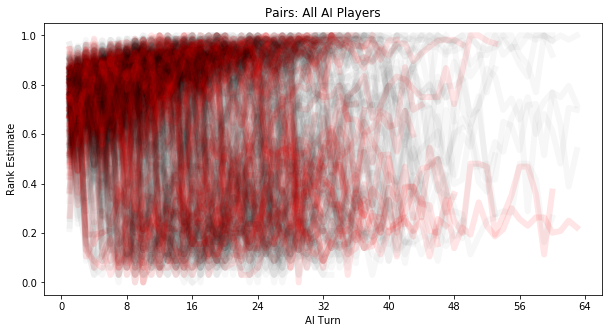

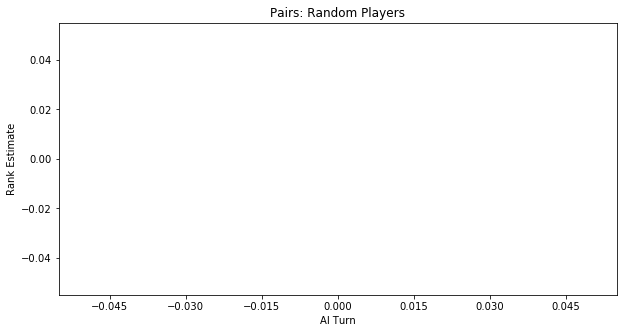

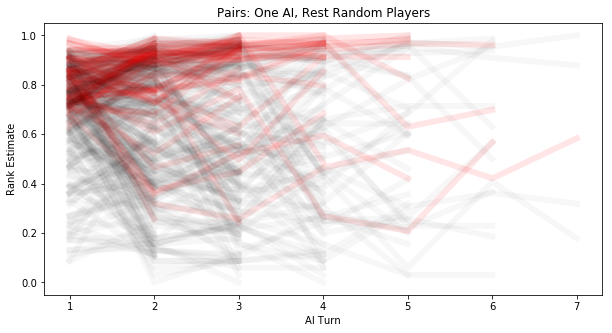

In [412]:
game = "Pairs"
nump = 5
for type in count.keys():
    fopen = open("../CardStockXam/bin/Release/games/" + game + str(nump) + ".gdl" + type + "-leadstats.txt")
    data = fopen.readlines()
    fopen.close()
    preds = [[], [], [], [], []]
    ax = plt.figure(figsize=(10,5)).gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(game + ": " + typename[type])
    plt.xlabel("AI Turn")
    plt.ylabel("Rank Estimate")
    for d in data[2:]:
        if not d[0].isdigit():
            plt.plot(range(1, len(preds[0]) + 1), preds[0], color="r", alpha=0.1, linewidth=6.0)
            for plist in preds[1:]:
                plt.plot(range(1, len(plist) + 1), plist, color="k", alpha=0.033, linewidth=6.0)
                pass
            preds = [[], [], [], [], []]
        else:
            leads = [float(x) for x in d[:-2].strip().split(",")]
            for p in range(nump):
                preds[p].append(leads[p + 1])


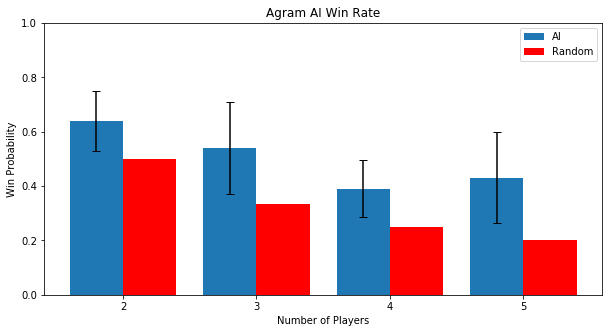

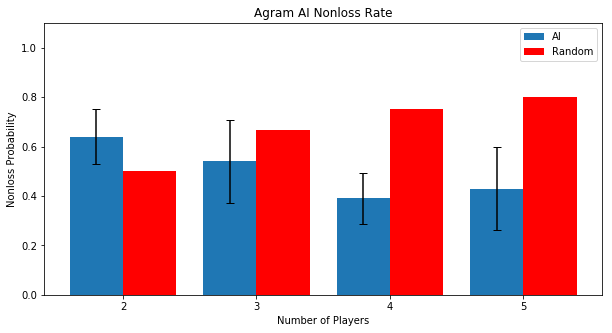

In [415]:
game = "Agram"
type = "RndandAI"
w = 0.4
fpw = []
fpwerr = []
nl = []
nlerr = []
for nump in range(2, 6):
    fopen = open("../CardStockXam/bin/Release/games/" + game + str(nump) + ".gdl" + type + "-resultsstats.txt")
    data = fopen.readlines()
    fopen.close()
    score = []
    rank = []
    ranks = []
    allrank = []
    for i in range(nump):
        scores = [int(x) for x in data[4 + i][:-2].strip().split(",")]
        score.append(sum(scores) / count[type])
        ranks.append([int(x) for x in data[4 + nump + 1 + i][:-2].strip().split(",")])
        allrank.extend(ranks[i])
        rank.append(sum(ranks[i]) / count[type])
    maxr = np.max(allrank)
    fpw.append(len([x for x in ranks[0] if x == 0]) / count[type])
    nl.append(len([x for x in ranks[0] if x != maxr]) / count[type])

    vals = []
    v2 = []
    for j in range(epoch):
        x = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x == 0]) / (count[type]/epoch)
        vals.append(x)
        y = len([x for x in ranks[0][epoch*j:epoch*(j+1)] if x != maxr]) / (count[type]/epoch)
        v2.append(y)
    fpwerr.append(np.std(vals))
    nlerr.append(np.std(v2))

expected = [1 / x for x in range(2, len(fpw) + 2)]
ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1)
plt.bar([x - w/2 for x in range(2, len(fpw) + 2)], fpw, width=w)
plt.bar([x + w/2 for x in range(2, len(fpw) + 2)], expected, width=w, color="r")
plt.errorbar([x - w/2 for x in range(2, len(fpw) + 2)], fpw, yerr=fpwerr, fmt='none', capsize=4, color="k")
plt.xlabel("Number of Players")
plt.ylabel("Win Probability")
plt.legend(["AI", "Random"])
plt.title(game + " AI Win Rate")

expected = [(x - 1) / x for x in range(2, len(fpw) + 2)]
ax = plt.figure(figsize=(10,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1.1)
plt.bar([x - w/2 for x in range(2, len(fpw) + 2)], nl, width=w)
plt.bar([x + w/2 for x in range(2, len(fpw) + 2)], expected, width=w, color="r")
plt.errorbar([x - w/2 for x in range(2, len(fpw) + 2)], nl, yerr=nlerr, fmt='none', capsize=4, color="k")
plt.xlabel("Number of Players")
plt.ylabel("Nonloss Probability")
plt.legend(["AI", "Random"])
plt.title(game + " AI Nonloss Rate")

In [368]:
fpwerr

[0.11135528725660045,
 0.16852299546352717,
 0.1044030650891055,
 0.16763054614240208]

In [337]:
rank

[0.36, 0.64]

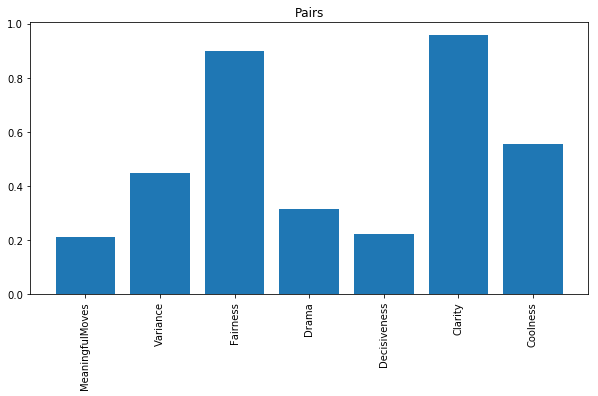

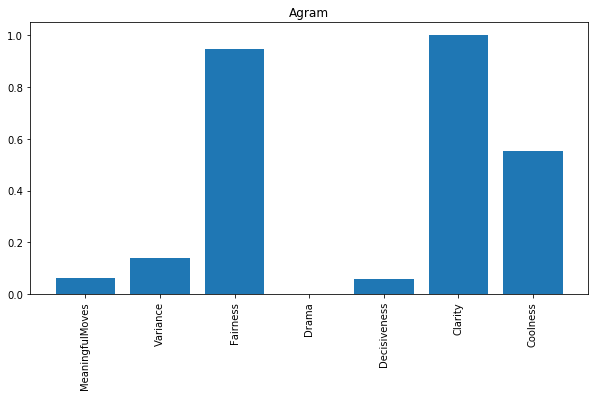

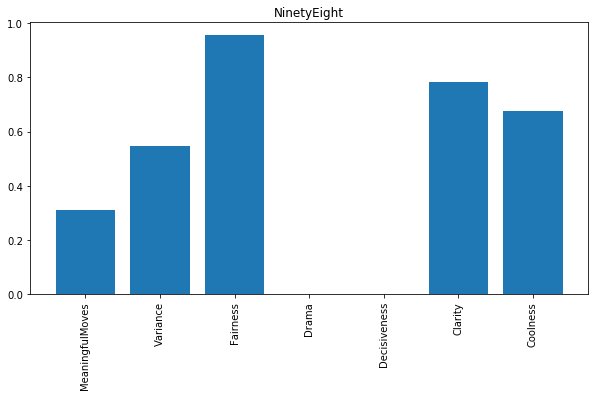

In [317]:
for game in ["Pairs", "Agram", "NinetyEight"]:
    fopen = open("data/" + game + ".gdl-heuristics.txt")
    data = fopen.readlines()
    fopen.close()
    names = []
    values = []
    for line in data:
        h = line.strip().split("\t")
        names.append(h[0])
        values.append(float(h[1]))
    plt.figure(figsize=(10,5))
    plt.bar(range(len(values)), values)
    plt.xticks(range(len(values)), names, rotation="vertical")
    plt.title(game)